<a href="https://colab.research.google.com/github/ramirojc/Diplodatos2020/blob/master/2_0_Intro_Curacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas
!apt install libspatialindex-dev
!pip install rtree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libspatialindex-dev is already the newest version (1.8.5-5).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [2]:
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon, MultiPoint, MultiLineString

/usr/local/lib/python3.6/dist-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
data_path = './drive/My Drive/BDGD/ENF_6612_2018-12-31_M10_20190529-1610.gdb'

In [4]:
# Carguemos la tabla de consumidores de baja tension denominada UCBT
conj = gpd.read_file(data_path, driver='FileGDB', layer='CONJ')
conj.shape, conj.columns

((5, 9), Index(['COD_ID', 'DIST', 'NOM', 'SIST_INTE', 'SIST_SUBT', 'DESCR',
        'Shape_Length', 'Shape_Area', 'geometry'],
       dtype='object'))

In [5]:
untrs = gpd.read_file(data_path, driver='FileGDB', layer='UNTRS')
untrs.shape, untrs.columns

((6, 53),
 Index(['COD_ID', 'SUB', 'BARR_1', 'BARR_2', 'BARR_3', 'PAC_1', 'PAC_2',
        'PAC_3', 'DIST', 'FAS_CON_P', 'FAS_CON_S', 'FAS_CON_T', 'SIT_ATIV',
        'TIP_UNID', 'POS', 'POT_NOM', 'POT_F01', 'POT_F02', 'PER_FER',
        'PER_TOT', 'BANC', 'DAT_CON', 'CONJ', 'MUN', 'TIP_TRAFO', 'ALOC_PERD',
        'ENES_01', 'ENES_02', 'ENES_03', 'ENES_04', 'ENES_05', 'ENES_06',
        'ENES_07', 'ENES_08', 'ENES_09', 'ENES_10', 'ENES_11', 'ENES_12',
        'ENET_01', 'ENET_02', 'ENET_03', 'ENET_04', 'ENET_05', 'ENET_06',
        'ENET_07', 'ENET_08', 'ENET_09', 'ENET_10', 'ENET_11', 'ENET_12',
        'DESCR', 'ARE_LOC', 'geometry'],
       dtype='object'))

In [6]:
untrd = gpd.read_file(data_path, driver='FileGDB', layer='UNTRD')
untrd.shape, untrd.columns

((3879, 33),
 Index(['COD_ID', 'DIST', 'PAC_1', 'PAC_2', 'PAC_3', 'FAS_CON_P', 'FAS_CON_S',
        'FAS_CON_T', 'SIT_ATIV', 'TIP_UNID', 'POS', 'ATRB_PER', 'TEN_LIN_SE',
        'CAP_ELO', 'CAP_CHA', 'TAP', 'CONF', 'POSTO', 'POT_NOM', 'PER_FER',
        'PER_TOT', 'DAT_CON', 'CTMT', 'UNI_TR_S', 'SUB', 'CONJ', 'MUN', 'BANC',
        'TIP_TRAFO', 'MRT', 'DESCR', 'ARE_LOC', 'geometry'],
       dtype='object'))

In [7]:
ssmt = gpd.read_file(data_path, driver='FileGDB', layer='SSDMT')
ssmt.columns, ssmt.columns

(Index(['COD_ID', 'PN_CON_1', 'PN_CON_2', 'CTMT', 'UNI_TR_S', 'SUB', 'CONJ',
        'DIST', 'PAC_1', 'PAC_2', 'FAS_CON', 'TIP_CND', 'POS', 'ODI_FAS',
        'TI_FAS', 'ODI_NEU', 'TI_NEU', 'COMP', 'DESCR', 'SITCONTFAS',
        'SITCONTNEU', 'ARE_LOC', 'Shape_Length', 'geometry'],
       dtype='object'),
 Index(['COD_ID', 'PN_CON_1', 'PN_CON_2', 'CTMT', 'UNI_TR_S', 'SUB', 'CONJ',
        'DIST', 'PAC_1', 'PAC_2', 'FAS_CON', 'TIP_CND', 'POS', 'ODI_FAS',
        'TI_FAS', 'ODI_NEU', 'TI_NEU', 'COMP', 'DESCR', 'SITCONTFAS',
        'SITCONTNEU', 'ARE_LOC', 'Shape_Length', 'geometry'],
       dtype='object'))

## Manejo de objetos graficos con Shapely

https://shapely.readthedocs.io/en/latest/manual.html

### Objetos geometricos basicos

In [8]:
untrs.geometry.head()

0    POINT (-42.38024 -22.28705)
1    POINT (-42.52043 -22.23040)
2    POINT (-42.68582 -22.26417)
3    POINT (-42.51374 -22.28512)
4    POINT (-42.53341 -22.27488)
Name: geometry, dtype: geometry

In [9]:
p = Point(1,0)
o = Point(0,0)

In [10]:
p.length, p.area, p.bounds, p.x, p.y

(0.0, 0.0, (1.0, 0.0, 1.0, 0.0), 1.0, 0.0)

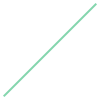

In [11]:
l = LineString([(1,1),(-1,-1)])
l

In [12]:
l.area, l.length, l.bounds, l.xy, l.centroid.xy

(0.0,
 2.8284271247461903,
 (-1.0, -1.0, 1.0, 1.0),
 (array('d', [1.0, -1.0]), array('d', [1.0, -1.0])),
 (array('d', [0.0]), array('d', [0.0])))

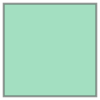

In [13]:
c = Polygon([(0,0),(0,1),(1,1),(1,0)])
c

In [14]:
c.area, c.length, c.bounds, c.centroid.xy

(1.0, 4.0, (0.0, 0.0, 1.0, 1.0), (array('d', [0.5]), array('d', [0.5])))

### Operaciones Basicas

In [15]:
p.distance(l) # Distancia del punto a linea

0.7071067811865476

In [16]:
l.contains(o) # Contiene

True

In [17]:
l.intersects(c) # Interseccion

True

### Joints Espaciales

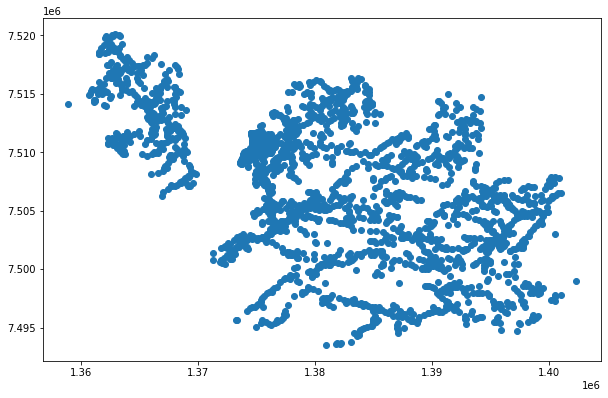

In [66]:
st = gpd.sjoin(untrd[['COD_ID','CONJ','geometry']], conj[['NOM','geometry']].iloc[:3], how='inner', op='within', lsuffix='untrs',rsuffix='conj')
st.plot(figsize=(10,10))

In [68]:
st.head()

,COD_ID,CONJ,geometry,index_conj,NOM
29,26878975,15615,POINT (1376182.173 7503439.714),2,JULIUS ARP JR.
30,26878976,15615,POINT (1378749.846 7503400.027),2,JULIUS ARP JR.
31,26878977,15615,POINT (1375495.911 7502741.477),2,JULIUS ARP JR.
32,26878978,15615,POINT (1377825.671 7504444.754),2,JULIUS ARP JR.
33,26878979,15615,POINT (1378413.454 7504500.889),2,JULIUS ARP JR.


## Sistemas de Coordenadas

In [20]:
conj = conj.to_crs(epsg=31982)
untrs = untrs.to_crs(epsg=31982)
untrd = untrd.to_crs(epsg=31982)
ssmt = ssmt.to_crs(epsg=31982)

In [21]:
untrd.distance(untrs.geometry[0])

0       24711.935210
1       24826.773729
2       25081.103330
3       25519.018894
4       25622.791019
            ...     
3874    11209.391238
3875     7538.717565
3876     8552.727475
3877    12512.703468
3878    10741.471603
Length: 3879, dtype: float64

In [22]:
! pip install libspatialindex

ERROR: Could not find a version that satisfies the requirement libspatialindex (from versions: none)
ERROR: No matching distribution found for libspatialindex
